# **PROBLEM STATEMENT**

Analyze how different lifestyle factors (sleep, exercise, social media use, and study habits) influence students’ academic performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files
uploaded = files.upload()

Saving students_lifestyle_5000.csv to students_lifestyle_5000.csv


# **Visualization before cleaning**

In [3]:
df = pd.read_csv("students_lifestyle_5000.csv")
df.head()

,Student_ID,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,S02765,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,S04768,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,S03815,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3
3,S03500,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,S04622,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               5000 non-null   object 
 1   Age                      5000 non-null   int64  
 2   Gender                   5000 non-null   object 
 3   Study_Hours_Per_Day      4708 non-null   float64
 4   Sleep_Hours              4664 non-null   float64
 5   Physical_Activity_Hours  4712 non-null   float64
 6   Screen_Time_Hours        5000 non-null   float64
 7   Social_Activity_Score    4701 non-null   float64
 8   Stress_Level             4714 non-null   object 
 9   Academic_Score           5000 non-null   float64
 10  Mental_Wellbeing_Score   5000 non-null   float64
 11  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 468.9+ KB


In [ ]:
# a detailed description of numeric concepts
desc = df[['Study_Hours_Per_Day', 'Sleep_Hours', 'Screen_Time_Hours', 'Social_Activity_Score', 'Mental_Wellbeing_Score',
           'Physical_Activity_Hours', 'Academic_Score']].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
print(desc)


        Study_Hours_Per_Day  Sleep_Hours  Screen_Time_Hours  \
mean               3.128619     7.016627           4.099088   
median             2.980000     6.980000           4.060000   
std                2.447051     1.584124           2.225928   
var                5.988057     2.509448           4.954754   
skew               2.938390     1.520415           0.858872   
kurt              21.101850    15.739354           3.640808   

        Social_Activity_Score  Mental_Wellbeing_Score  \
mean                 6.031568               42.976740   
median               6.000000               42.800000   
std                  1.950323                9.746892   
var                  3.803761               95.001909   
skew                -0.103826                0.072116   
kurt                -0.406770                0.414295   

        Physical_Activity_Hours  Academic_Score  
mean                   1.024465       71.697000  
median                 0.880000       71.600000  
std     

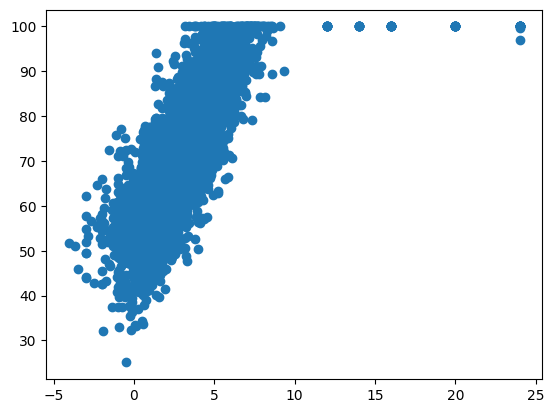

In [ ]:
plt.scatter(df['Study_Hours_Per_Day'], df['Academic_Score'])

<Axes: xlabel='Gender', ylabel='count'>

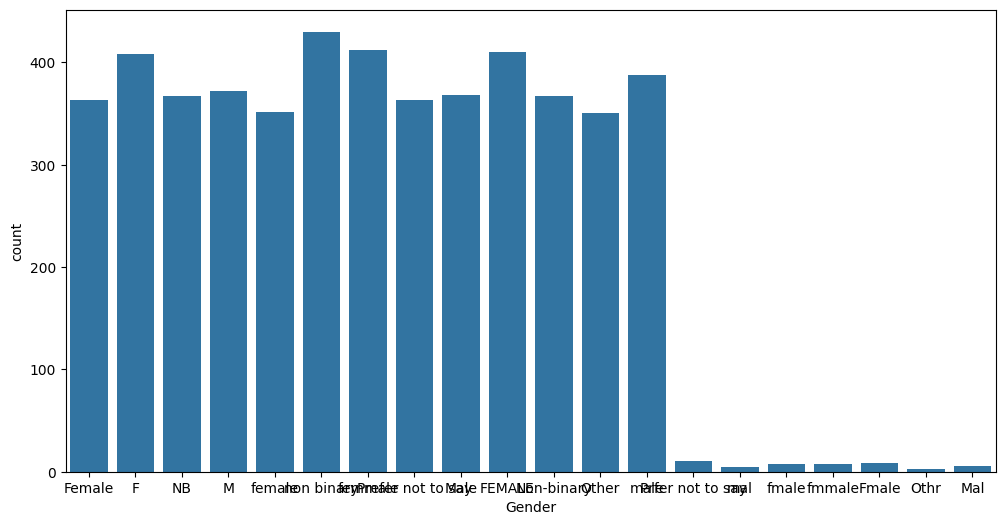

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)

In [ ]:
df["Gender"].unique()

array(['Female', 'F', 'NB', 'M', 'female', 'non binary', 'femmale',
       'Prefer not to say', 'Male', 'FEMALE', 'Non-binary', 'Other',
       'male', 'Prfer not to say', 'mal', 'fmale', 'fmmale', 'Fmale',
       'Othr', 'Mal'], dtype=object)

In [ ]:
df["Gender"].value_counts()

,count
Gender,
non binary,430
femmale,412
FEMALE,410
F,408
male,388
M,372
Male,368
NB,367
Non-binary,367


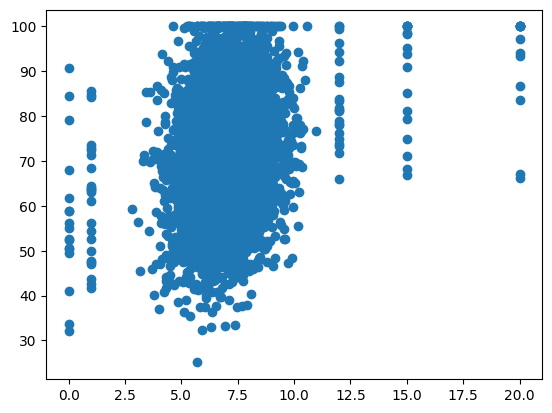

In [ ]:
plt.scatter(df['Sleep_Hours'], df['Academic_Score'])

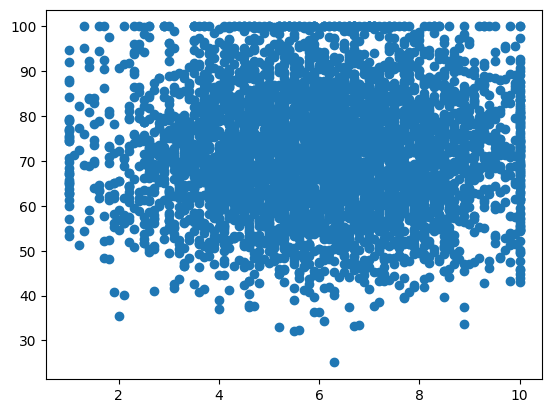

In [ ]:
plt.scatter(df['Social_Activity_Score'], df['Academic_Score'])

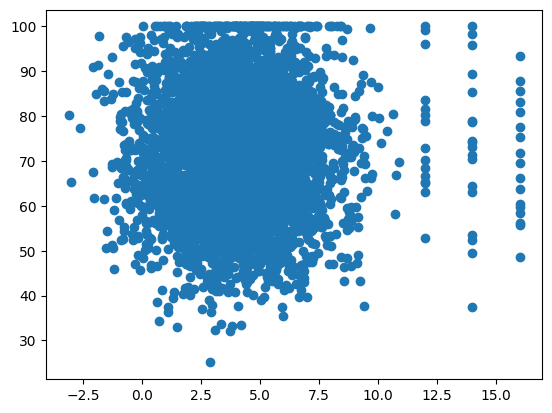

In [ ]:
plt.scatter(df['Screen_Time_Hours'], df['Academic_Score'])

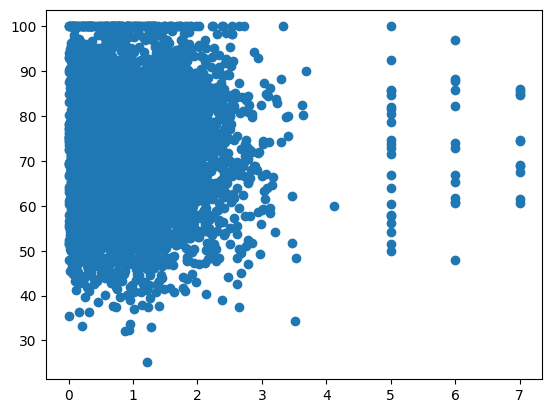

In [ ]:
plt.scatter(df['Physical_Activity_Hours'], df['Academic_Score'])

<Axes: xlabel='Stress_Level', ylabel='count'>

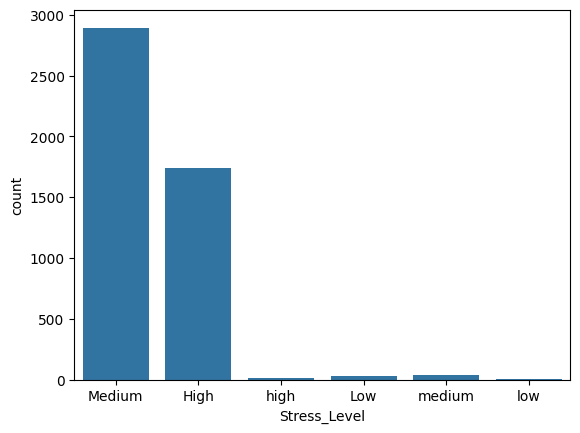

In [ ]:
sns.countplot(x='Stress_Level', data=df)

<Axes: xlabel='Study_Hours_Per_Day', ylabel='Count'>

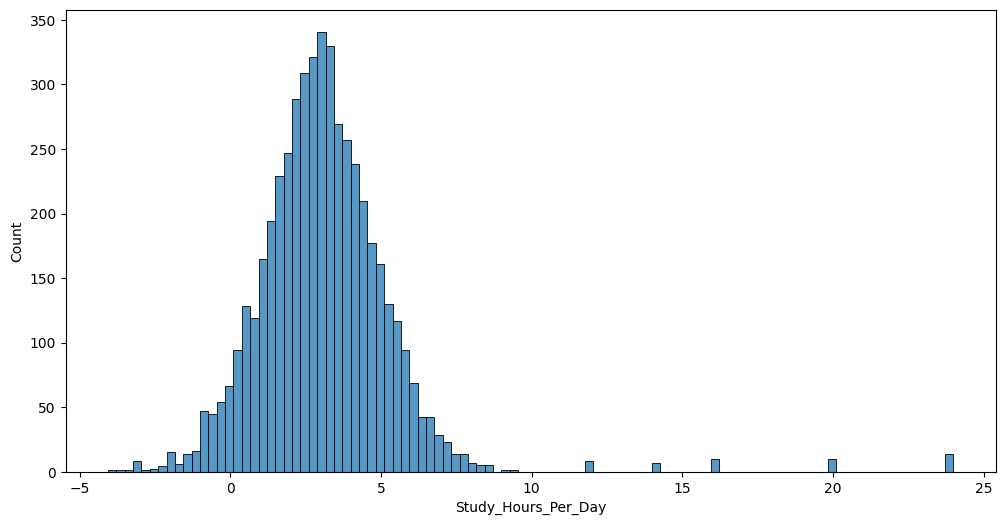

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Study_Hours_Per_Day', data=df)

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

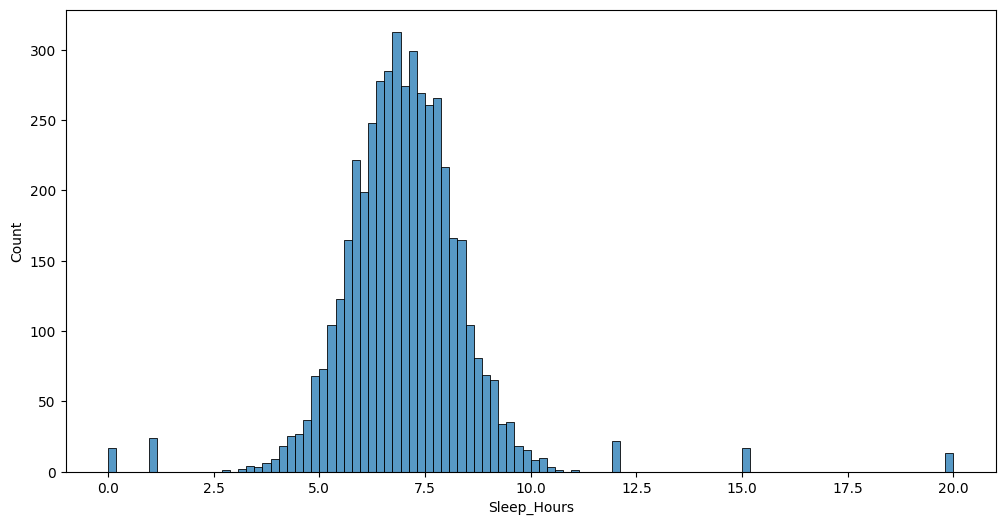

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Sleep_Hours', data=df)

<Axes: xlabel='Physical_Activity_Hours', ylabel='Count'>

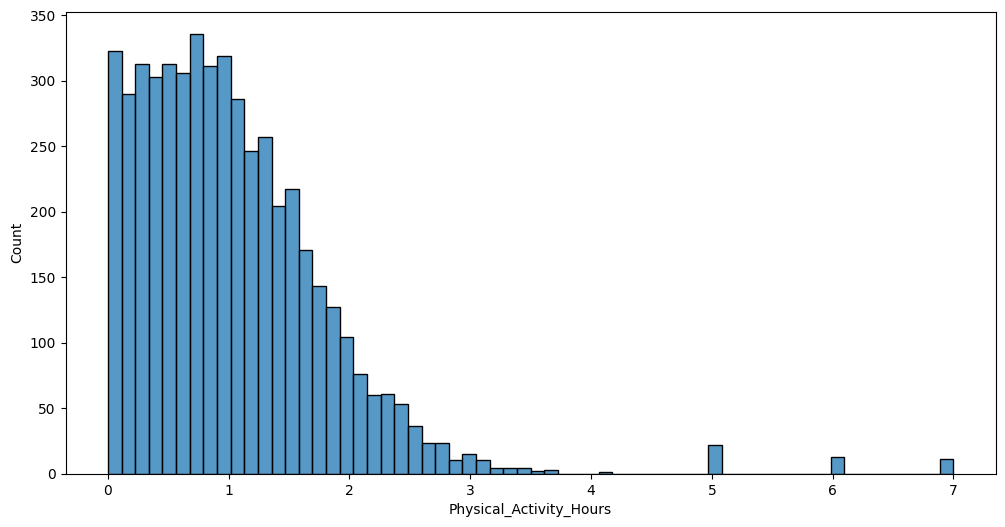

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Physical_Activity_Hours', data=df)

In [ ]:
df["Physical_Activity_Hours"].describe()

,Physical_Activity_Hours
count,5000.000000
mean,1.034208
std,0.813106
min,0.000000
25%,0.460000
50%,0.910000
75%,1.430000
max,7.000000


<Axes: xlabel='Social_Activity_Score', ylabel='Count'>

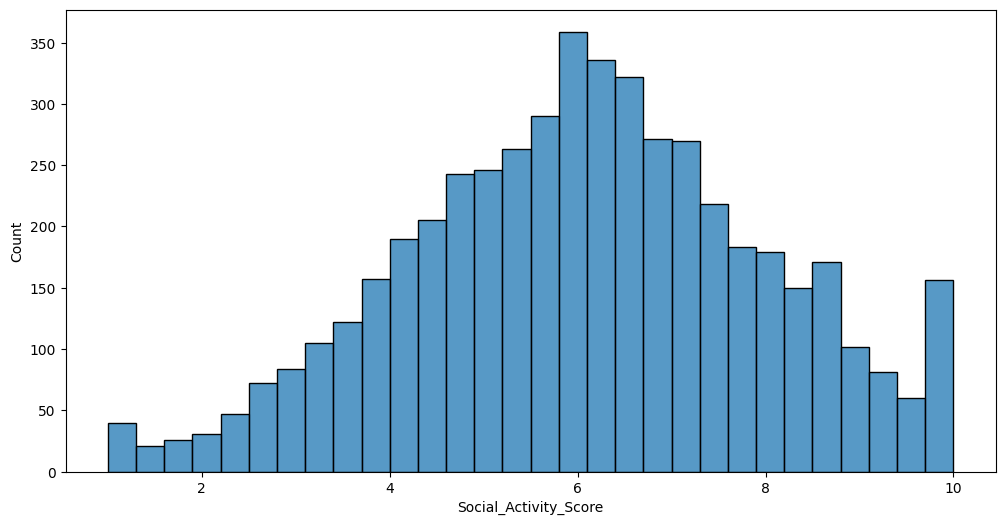

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Social_Activity_Score', data=df)

In [ ]:
df['Social_Activity_Score'].describe()

,Social_Activity_Score
count,5000.000000
mean,6.031460
std,1.903475
min,1.000000
25%,4.700000
50%,6.070000
75%,7.300000
max,10.000000


<Axes: xlabel='Mental_Wellbeing_Score', ylabel='Count'>

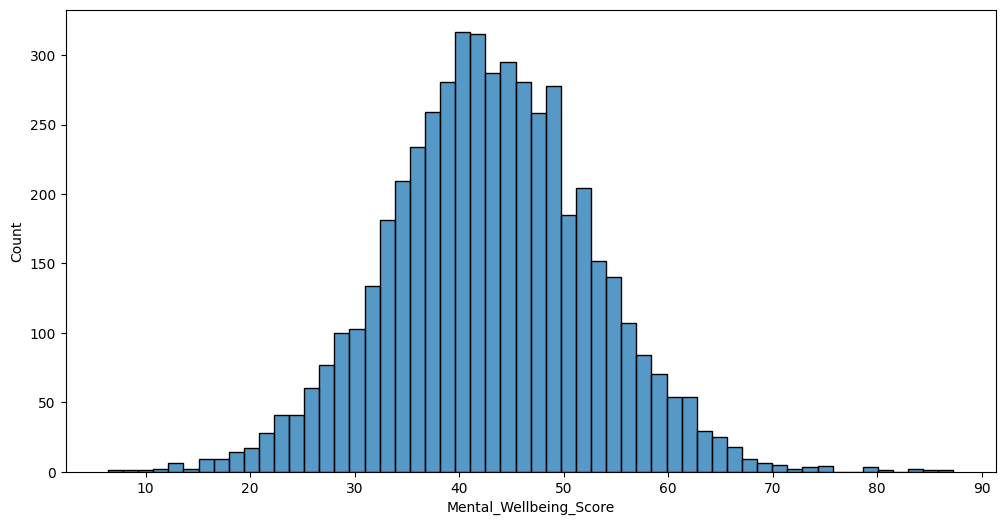

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Mental_Wellbeing_Score', data=df)

In [ ]:
df['Mental_Wellbeing_Score'].describe()

,Mental_Wellbeing_Score
count,5000.000000
mean,42.976740
std,9.746892
min,6.400000
25%,36.700000
50%,42.800000
75%,49.200000
max,87.300000


<Axes: xlabel='Attendance_Rate', ylabel='Count'>

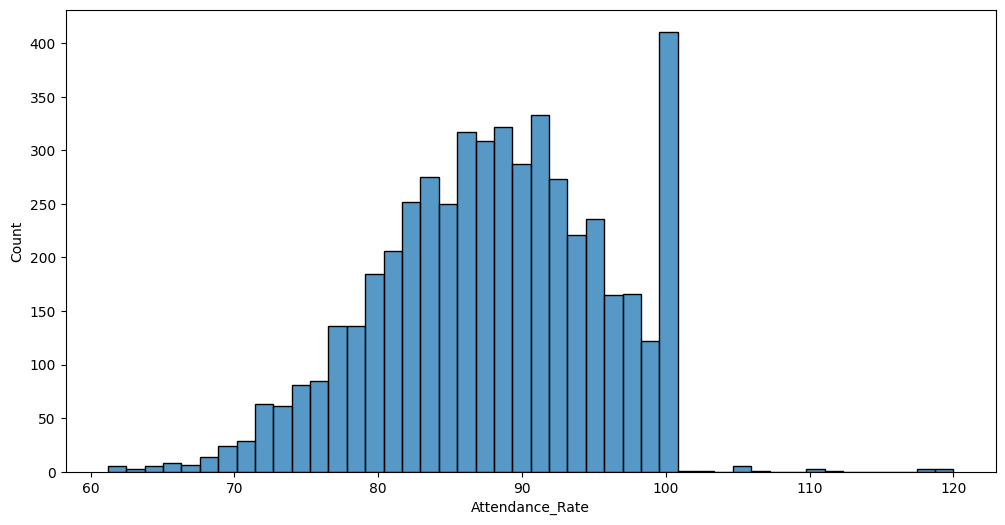

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Attendance_Rate', data=df)

In [ ]:
df['Attendance_Rate'].describe()

,Attendance_Rate
count,5000.000000
mean,87.950340
std,7.729093
min,61.200000
25%,82.700000
50%,88.300000
75%,93.700000
max,120.000000


<Axes: xlabel='Screen_Time_Hours', ylabel='Count'>

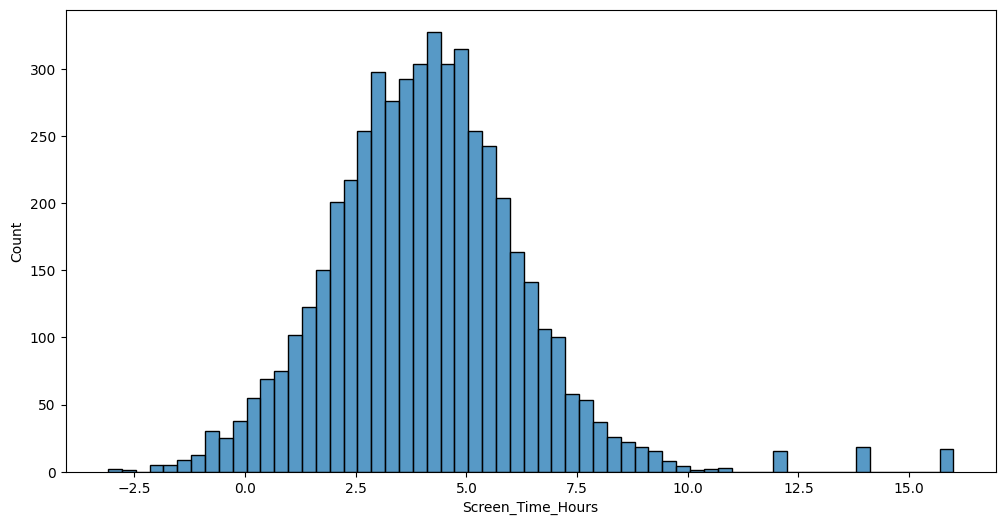

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Screen_Time_Hours', data=df)

In [ ]:
df['Screen_Time_Hours'].describe()

,Screen_Time_Hours
count,5000.000000
mean,4.099088
std,2.225928
min,-3.100000
25%,2.680000
50%,4.060000
75%,5.360000
max,16.000000


In [ ]:
df.head()

,Student_ID,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
0,S02765,18,Female,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2
1,S04768,24,F,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8
2,S03815,24,Female,3.45,8.00,0.11,5.59,5.9,NaN,68.1,37.4,72.3
3,S03500,16,NB,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7
4,S04622,27,Female,-0.10,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6


In [5]:
df.drop(columns=['Student_ID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      4708 non-null   float64
 3   Sleep_Hours              4664 non-null   float64
 4   Physical_Activity_Hours  4712 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    4701 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


Text(0.5, 1.0, 'Missing Values Heatmap')

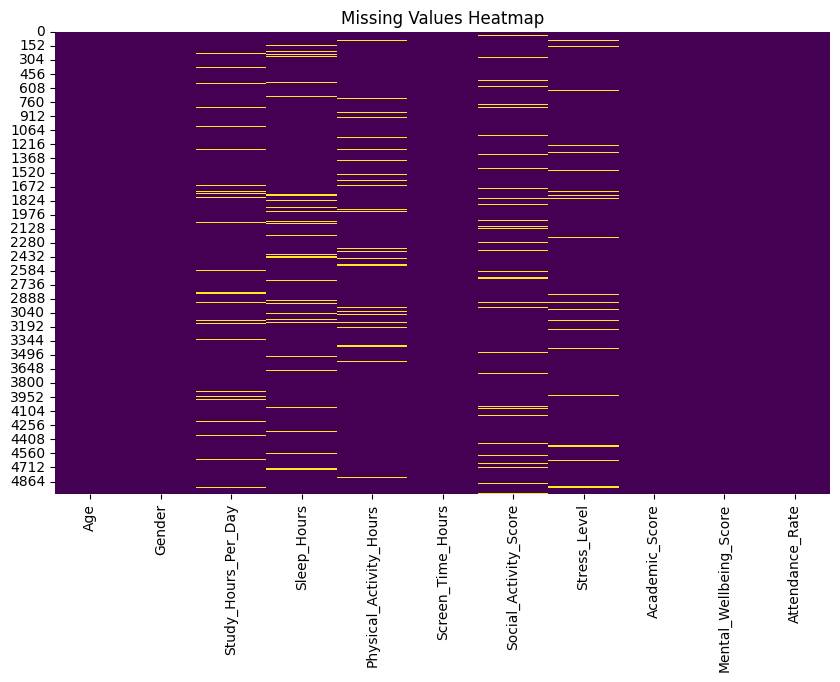

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')

# **Findings**

1. columns like Study_Hours_Per_Day,	Sleep_Hours,	Physical_Activity_Hours,	and	Social_Activity_Score have many missing values.
2. Study_Hours_Per_Day,	Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Attendance_Rate and metnal_wellbeing_score columns have outliers that needed to remove.
3. dataset has 9 numerical columns and only two categorical columns.
4. categorical like gender and stress level have same categories with diferent name.


In [ ]:
df.describe(include='all')

,Age,Gender,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate
count,5000.000000,5000,4708.000000,4664.000000,4712.000000,5000.000000,4701.000000,4714,5000.000000,5000.000000,5000.000000
unique,NaN,20,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN
top,NaN,non binary,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,NaN
freq,NaN,430,NaN,NaN,NaN,NaN,NaN,2894,NaN,NaN,NaN
mean,22.149600,NaN,3.128619,7.016627,1.024465,4.099088,6.031568,NaN,71.697000,42.976740,87.950340
std,4.015725,NaN,2.447051,1.584124,0.829936,2.225928,1.950323,NaN,13.303745,9.746892,7.729093
min,16.000000,NaN,-4.060000,0.000000,0.000000,-3.100000,1.000000,NaN,25.100000,6.400000,61.200000
25%,19.000000,NaN,1.770000,6.180000,0.440000,2.680000,4.700000,NaN,62.275000,36.700000,82.700000
50%,22.000000,NaN,2.980000,6.980000,0.880000,4.060000,6.000000,NaN,71.600000,42.800000,88.300000
75%,25.000000,NaN,4.260000,7.790000,1.430000,5.360000,7.400000,NaN,80.600000,49.200000,93.700000


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      4708 non-null   float64
 3   Sleep_Hours              4664 non-null   float64
 4   Physical_Activity_Hours  4712 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    4701 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


# **Handle missing value**

all of numerical columns like 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Activity_Score' has more than 5% missing so thats why we are using Statistical/ML Imputation.

In [6]:

imputer = KNNImputer(n_neighbors=5)
cols = ['Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours', 'Social_Activity_Score']
df[cols] = imputer.fit_transform(df[cols])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             4714 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


In [ ]:
df["Stress_Level"].unique()

array(['Medium', nan, 'High', 'high', 'Low', 'medium', 'low'],
      dtype=object)

In [7]:
df['Stress_Level'] = df['Stress_Level'].str.title()
df["Stress_Level"].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [ ]:
df["Stress_Level"].value_counts()

,count
Stress_Level,
Medium,2928
High,1752
Low,34


In [8]:
imputer = SimpleImputer(strategy='most_frequent')
df[['Stress_Level']] = imputer.fit_transform(df[['Stress_Level']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


# **Insights**

as the categorical column "stress level" has more missing values then 5% so we are relace it with mode.

In [9]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'f': 'female',
    'female': 'female',
    'femmale': 'female',
    'fmale': 'female',
    'fmmale': 'female',
    'm': 'male',
    'male': 'male',
    'mal': 'male',
    'nb': 'non-binary',
    'non binary': 'non-binary',
    'non-binary': 'non-binary',
    'prefer not to say': 'prefer not to say',
    'prfer not to say': 'prefer not to say',
    'other': 'other',
    'othr': 'other'
})
df["Gender"].unique()

array(['female', 'non-binary', 'male', 'prefer not to say', 'other'],
      dtype=object)

Text(0.5, 1.0, 'Average Score by Gender')

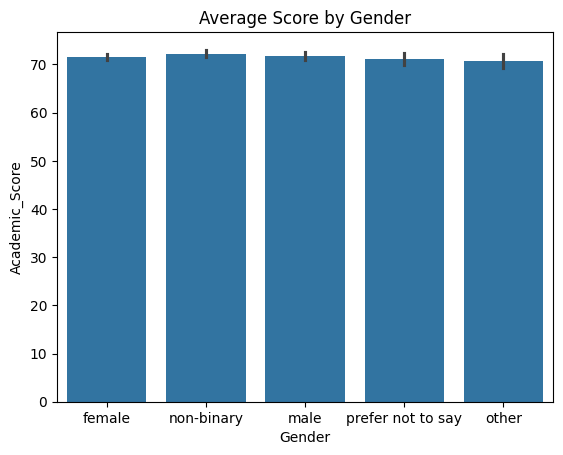

In [ ]:
sns.barplot(x='Gender', y='Academic_Score', data=df, estimator='mean')
plt.title('Average Score by Gender')

Text(0.5, 1.0, 'Score Distribution by Gender')

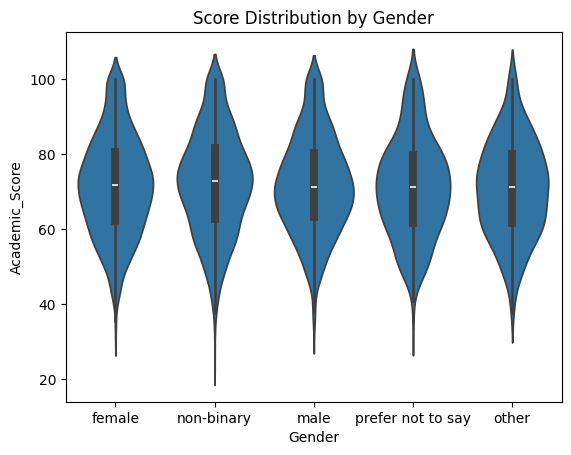

In [ ]:
sns.violinplot(x='Gender', y='Academic_Score', data=df)
plt.title('Score Distribution by Gender')

In [ ]:
df["Gender"].value_counts()

,count
Gender,
female,1970
non-binary,1164
male,1139
prefer not to say,373
other,354


In [10]:
from scipy.stats import f_oneway

groups = [df[df['Gender']==g]['Academic_Score'].dropna() for g in df['Gender'].unique()]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA p-value: {p_val}")


ANOVA p-value: 0.28170970467234946


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, f_regression
le = LabelEncoder()
df['Stress_Level_encoded'] = le.fit_transform(df['Stress_Level'])
f_value, p_value = f_regression(df[['Stress_Level_encoded']], df['Academic_Score'])
print("F-value:", f_value, "P-value:", p_value)

F-value: [34.33127868] P-value: [4.94617554e-09]


# **Insights**

as we can see above Anova p value is < 0.5 all means categroies are imp so we cannot merger nono binary , other and pefer not say as one

# **Removing Outliers**

In [ ]:
df["Study_Hours_Per_Day"].describe()

,Study_Hours_Per_Day
count,5000.000000
mean,3.121694
std,2.387305
min,-4.060000
25%,1.830000
50%,2.980000
75%,4.210000
max,24.000000


In [12]:
#fill negative values with zero and extreme with uper wisker
df.loc[df['Study_Hours_Per_Day'] < 0, 'Study_Hours_Per_Day'] = 0

Q1 = df['Study_Hours_Per_Day'].quantile(0.25)
Q3 = df['Study_Hours_Per_Day'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Study_Hours_Per_Day'] > upper_limit, 'Study_Hours_Per_Day'] = upper_limit

df['Study_Hours_Per_Day'].describe()

,Study_Hours_Per_Day
count,5000.000000
mean,3.061080
std,1.769598
min,0.000000
25%,1.830000
50%,2.980000
75%,4.210000
max,7.780000


In [13]:
#stats addition
from scipy import stats
z_scores = np.abs(stats.zscore(df['Study_Hours_Per_Day']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [ ]:
df["Sleep_Hours"].describe()

In [14]:
Q1 = df['Sleep_Hours'].quantile(0.25)
Q3 = df['Sleep_Hours'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Sleep_Hours'] < lower_limit, 'Sleep_Hours'] = 3.8
df.loc[df['Sleep_Hours'] > upper_limit, 'Sleep_Hours'] = upper_limit
df['Sleep_Hours'].describe()

,Sleep_Hours
count,5000.000000
mean,6.987374
std,1.201593
min,3.800000
25%,6.210000
50%,6.970000
75%,7.760000
max,10.085000


In [15]:
#stats addition
z_scores = np.abs(stats.zscore(df['Sleep_Hours']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [16]:
Q1 = df['Physical_Activity_Hours'].quantile(0.25)
Q3 = df['Physical_Activity_Hours'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Physical_Activity_Hours'] > upper_limit, 'Physical_Activity_Hours'] = upper_limit
df['Physical_Activity_Hours'].describe()

,Physical_Activity_Hours
count,5000.000000
mean,1.004974
std,0.684425
min,0.000000
25%,0.460000
50%,0.910000
75%,1.430000
max,2.885000


In [17]:
#stats addition

z_scores = np.abs(stats.zscore(df['Physical_Activity_Hours']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [18]:

df.loc[df['Screen_Time_Hours'] < 0, 'Screen_Time_Hours'] = 0
Q1 = df['Screen_Time_Hours'].quantile(0.25)
Q3 = df['Screen_Time_Hours'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
df.loc[df['Screen_Time_Hours'] > upper_limit, 'Screen_Time_Hours'] = upper_limit

In [ ]:
#stats addition

z_scores = np.abs(stats.zscore(df['Screen_Time_Hours']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [19]:

Q1 = df['Mental_Wellbeing_Score'].quantile(0.25)
Q3 = df['Mental_Wellbeing_Score'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Mental_Wellbeing_Score'] < lower_limit, 'Mental_Wellbeing_Score'] = lower_limit
df.loc[df['Mental_Wellbeing_Score'] > upper_limit, 'Mental_Wellbeing_Score'] = upper_limit
df['Mental_Wellbeing_Score'].describe()

,Mental_Wellbeing_Score
count,5000.000000
mean,42.959910
std,9.568093
min,17.950000
25%,36.700000
50%,42.800000
75%,49.200000
max,67.950000


In [20]:
#stats addition

z_scores = np.abs(stats.zscore(df['Mental_Wellbeing_Score']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


In [21]:
Q1 = df['Attendance_Rate'].quantile(0.25)
Q3 = df['Attendance_Rate'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df.loc[df['Attendance_Rate'] < lower_limit, 'Attendance_Rate'] = lower_limit
df.loc[df['Attendance_Rate'] > 100, 'Attendance_Rate'] = 100
df['Attendance_Rate'].describe()

,Attendance_Rate
count,5000.000000
mean,87.929580
std,7.633988
min,66.200000
25%,82.700000
50%,88.300000
75%,93.700000
max,100.000000


In [22]:
#stats addition

z_scores = np.abs(stats.zscore(df['Attendance_Rate']))
outliers = np.sum(z_scores > 3)
print(f"Outliers found: {outliers}")

Outliers found: 0


# **EDA(Univariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


In [ ]:
df["Age"].unique()

array([18, 24, 16, 27, 23, 22, 21, 25, 17, 20, 19, 26, 30])

<Axes: xlabel='Age', ylabel='count'>

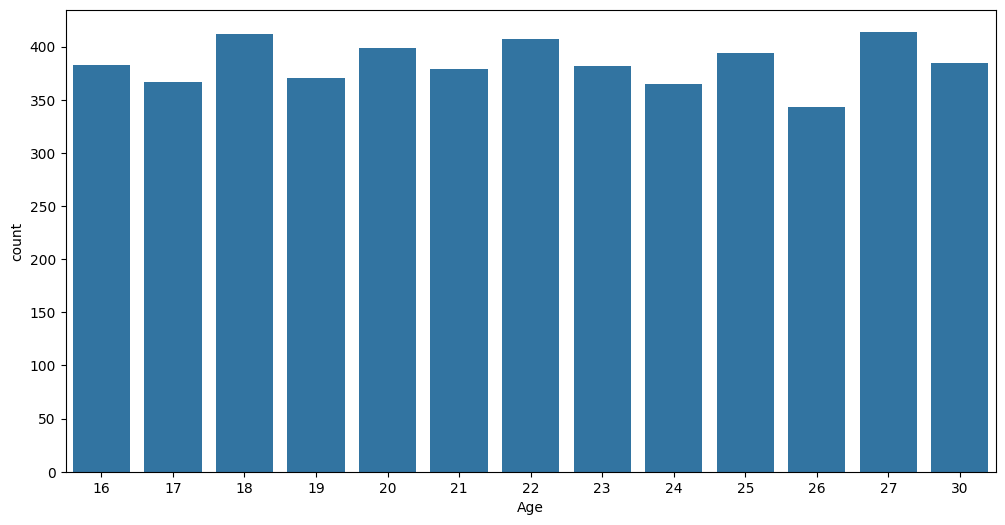

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df)

<Axes: xlabel='Stress_Level', ylabel='count'>

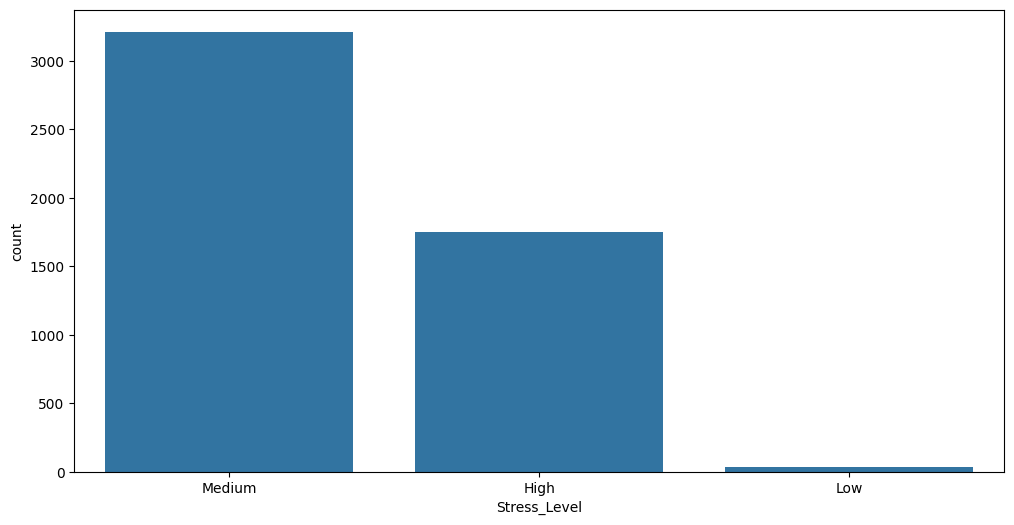

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Stress_Level', data=df)

<Axes: xlabel='Gender', ylabel='count'>

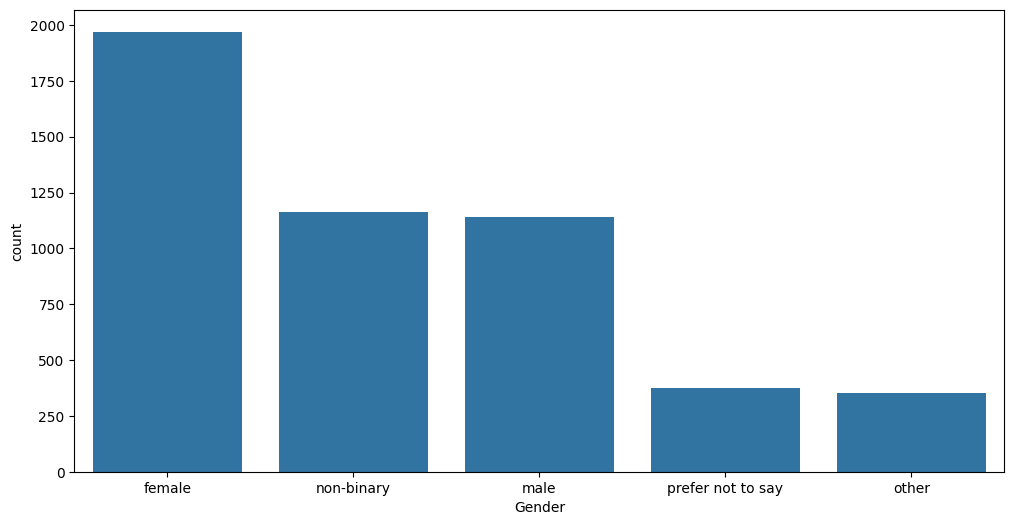

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', data=df)

<Axes: xlabel='Study_Hours_Per_Day', ylabel='Count'>

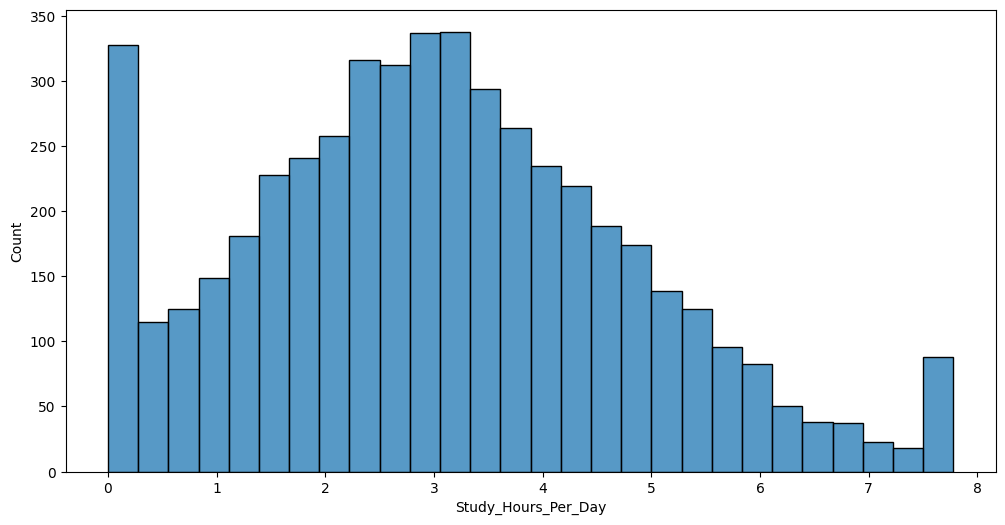

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Study_Hours_Per_Day', data=df)

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

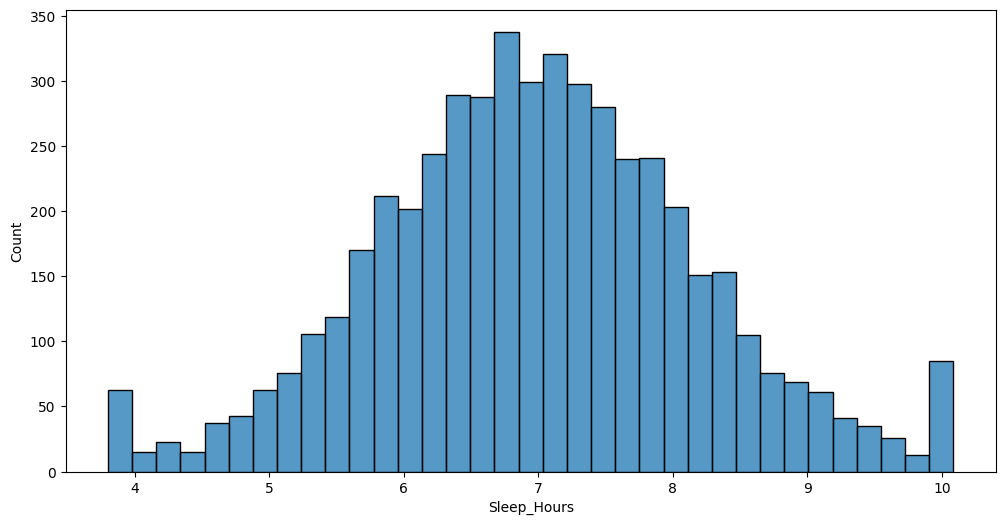

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Sleep_Hours', data=df)

<Axes: xlabel='Physical_Activity_Hours', ylabel='Count'>

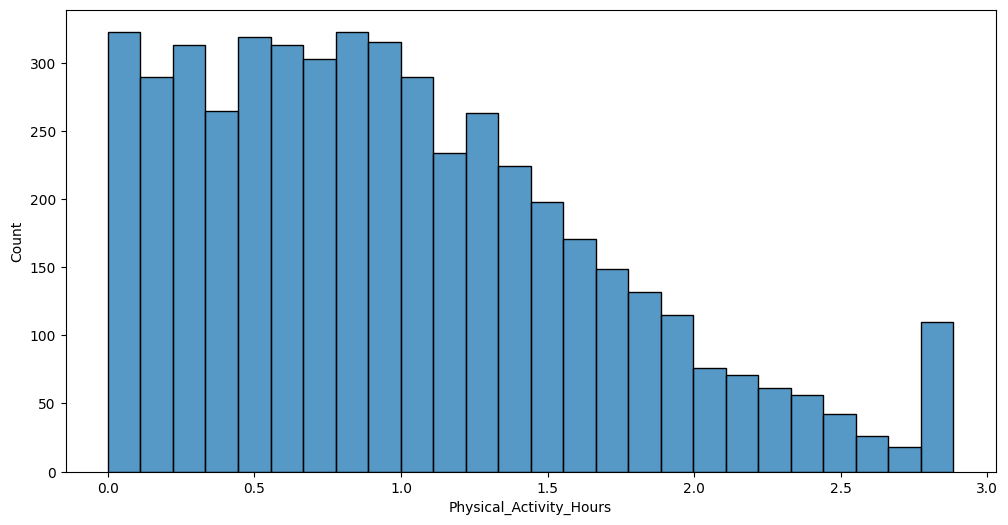

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Physical_Activity_Hours', data=df)

In [23]:
# stats addition
from scipy.stats import shapiro, skew

for col in ['Age', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours']:
    stat, p = shapiro(df[col])
    print(f"{col} -> p-value = {p:.4f}")

Age -> p-value = 0.0000
Study_Hours_Per_Day -> p-value = 0.0000
Sleep_Hours -> p-value = 0.0000
Physical_Activity_Hours -> p-value = 0.0000


In [24]:
for col in ['Age','Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours']:
  print("Skewness:", skew(df[col]))

Skewness: 0.247252748578068
Skewness: 0.3281183545330751
Skewness: 0.03849972482098434
Skewness: 0.7042172480628089


# **Insights**
we can see that only 'Physical_Activity_Hours' have skewness > 0.5 whereas 'Age', Study_Hours_Per_Day 'and 'Sleep_Hours' have skweness between -0.5 to +0.5 which mean we can apply test like t test/z test/ANOVA on it even through their p values are less than 0.005

<Axes: xlabel='Screen_Time_Hours', ylabel='Count'>

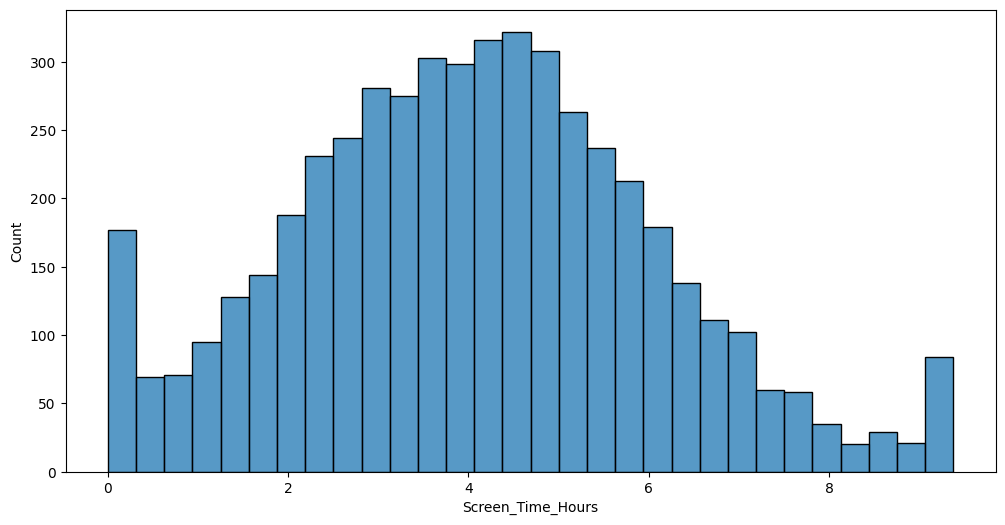

In [ ]:

plt.figure(figsize=(12, 6))
sns.histplot(x='Screen_Time_Hours', data=df)


<Axes: xlabel='Social_Activity_Score', ylabel='Count'>

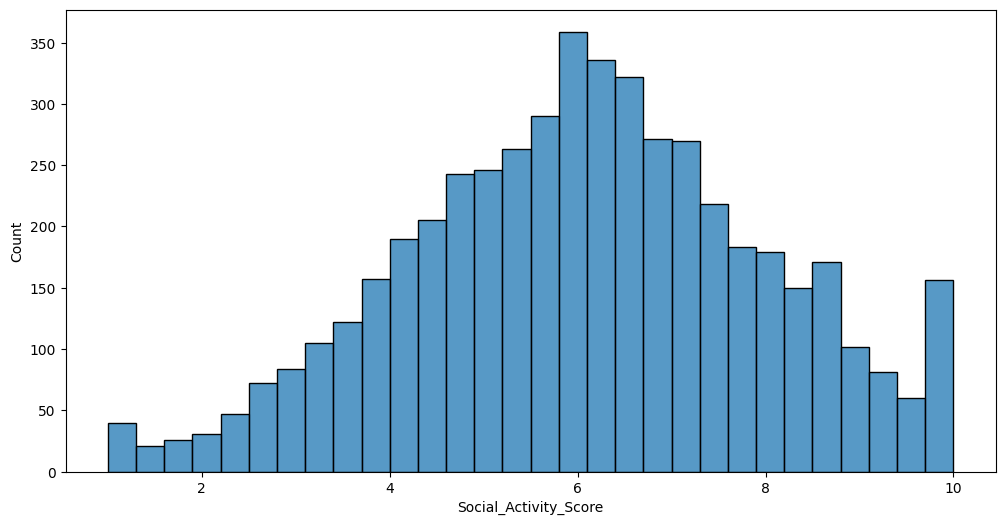

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Social_Activity_Score', data=df)

<Axes: xlabel='Mental_Wellbeing_Score', ylabel='Count'>

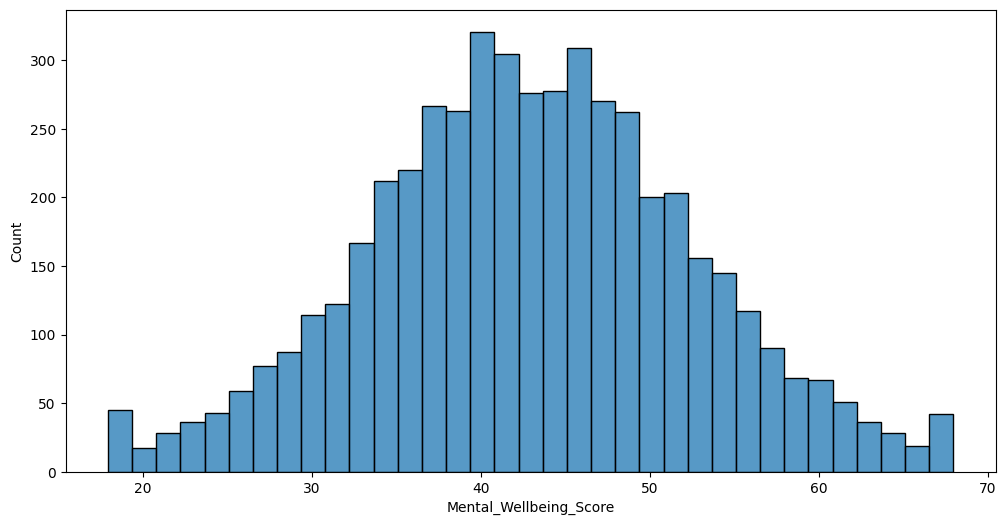

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Mental_Wellbeing_Score', data=df)

<Axes: xlabel='Attendance_Rate', ylabel='Count'>

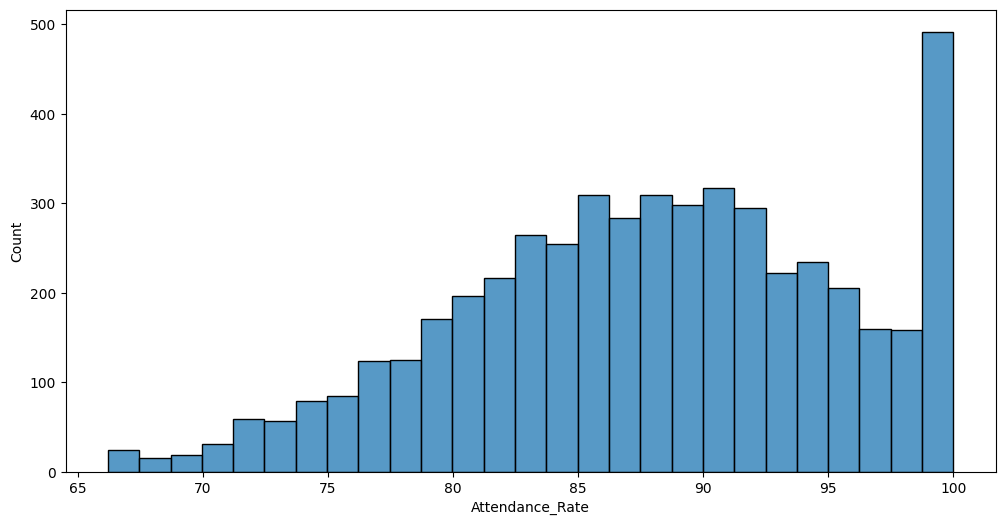

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Attendance_Rate', data=df)

In [ ]:
# stats addition

for col in ['Screen_Time_Hours', 'Mental_Wellbeing_Score', 'Attendance_Rate', 'Social_Activity_Score']:
    stat, p = shapiro(df[col])
    print(f"{col} -> p-value = {p:.4f}")

Screen_Time_Hours -> p-value = 0.0000
Mental_Wellbeing_Score -> p-value = 0.0000
Attendance_Rate -> p-value = 0.0000
Social_Activity_Score -> p-value = 0.0000


In [ ]:
for col in ['Screen_Time_Hours', 'Mental_Wellbeing_Score', 'Attendance_Rate', 'Social_Activity_Score']:
  print("Skewness:", skew(df[col]))

Skewness: 0.19860739276819697
Skewness: 0.014940194970796688
Skewness: -0.29356391247432717
Skewness: -0.10599599151135324


# **Insights**
we can see that all 'Screen_Time_Hours', 'Mental_Wellbeing_Score', 'Attendance_Rate', 'Social_Activity_Score' have skweness between -0.5 to +0.5 which mean we can apply test like t test/z test/ANOVA on it even through their p values are less than 0.005

# **Insights**

from histrogram and countplots it is shown there is no outliers and same categories with diferent name right now.

# **EDA(Bivariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


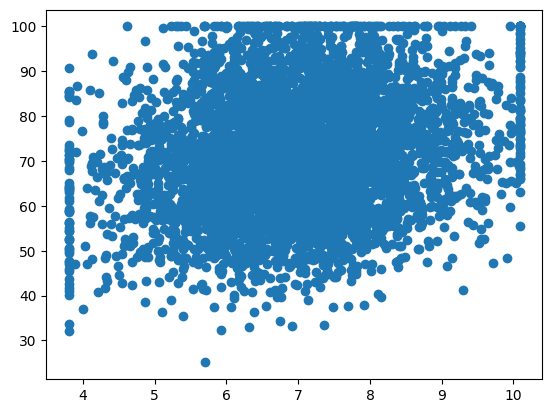

In [ ]:
plt.scatter(df['Sleep_Hours'], df['Academic_Score'])

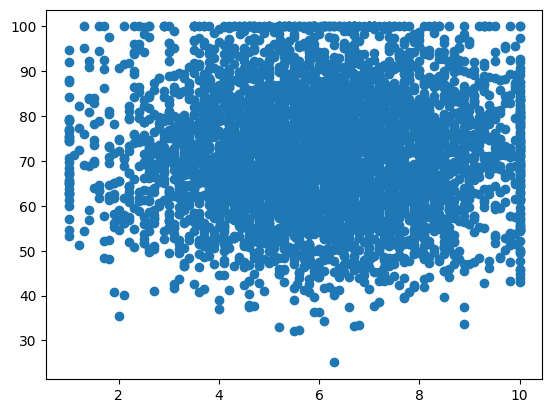

In [ ]:
plt.scatter(df['Social_Activity_Score'], df['Academic_Score'])

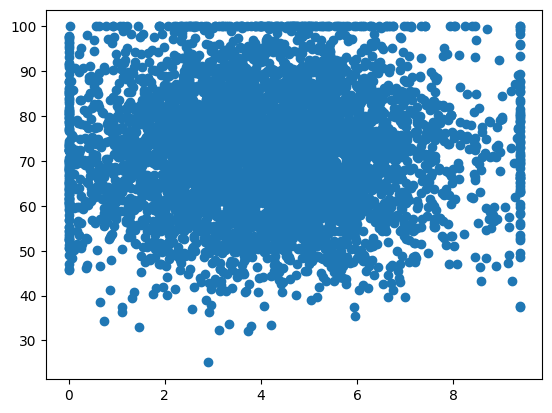

In [ ]:
plt.scatter(df['Screen_Time_Hours'], df['Academic_Score'])

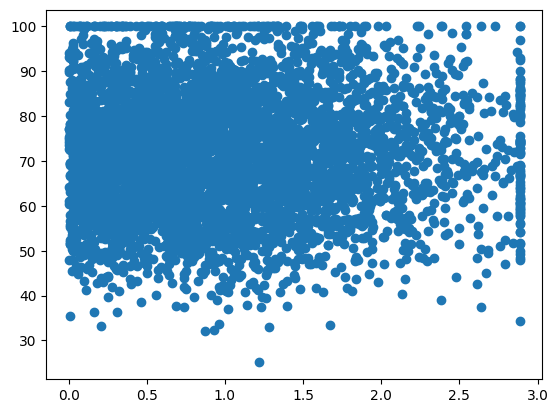

In [ ]:
plt.scatter(df['Physical_Activity_Hours'], df['Academic_Score'])

Text(0.5, 1.0, 'Score Distribution by Stress Level')

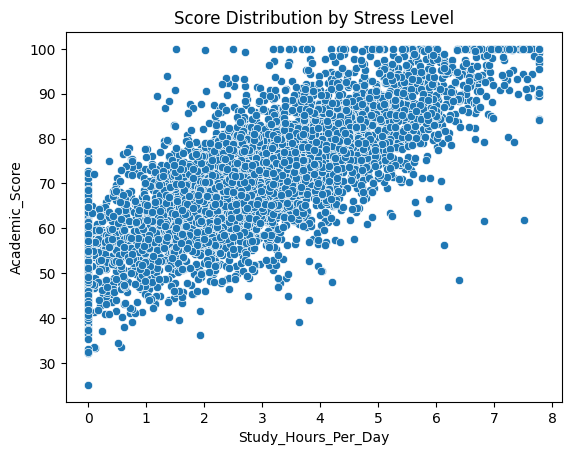

In [ ]:
sns.scatterplot(x='Study_Hours_Per_Day', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

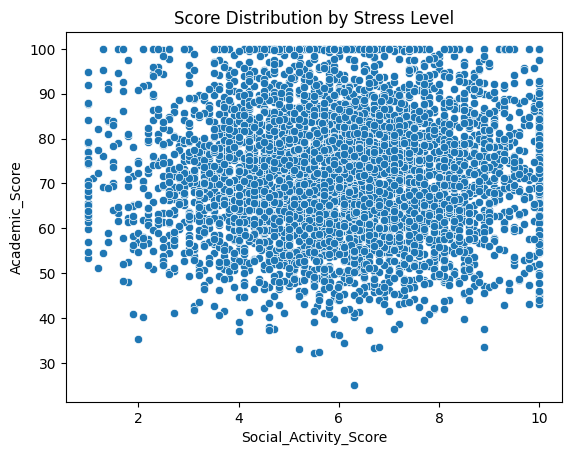

In [ ]:
sns.scatterplot(x='Social_Activity_Score', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

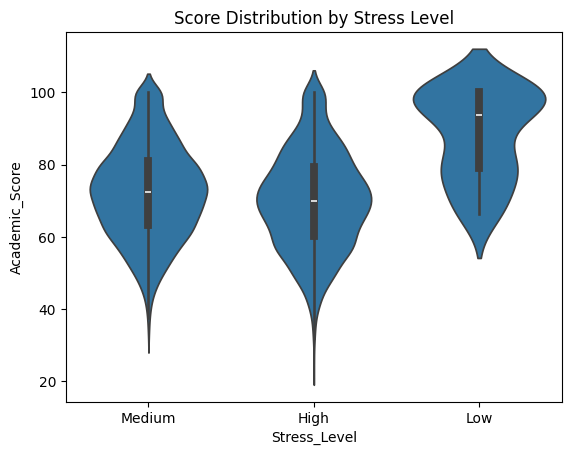

In [ ]:
sns.violinplot(x='Stress_Level', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

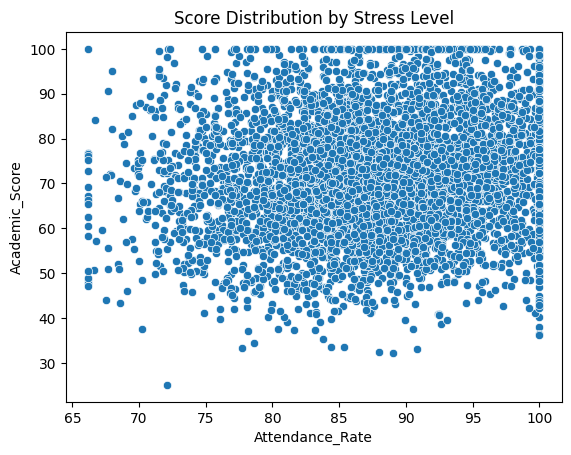

In [ ]:
sns.scatterplot(x='Attendance_Rate', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

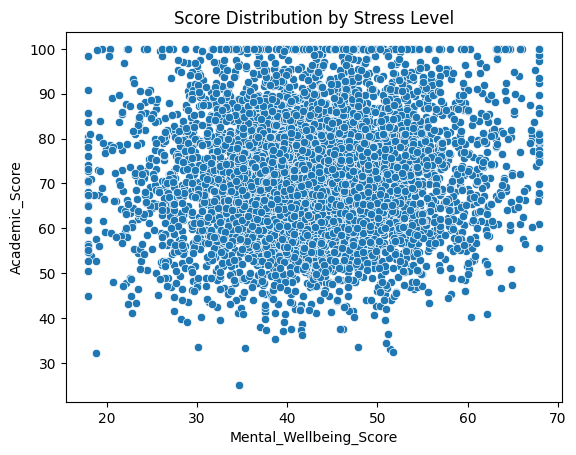

In [ ]:
sns.scatterplot(x='Mental_Wellbeing_Score', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

Text(0.5, 1.0, 'Score Distribution by Stress Level')

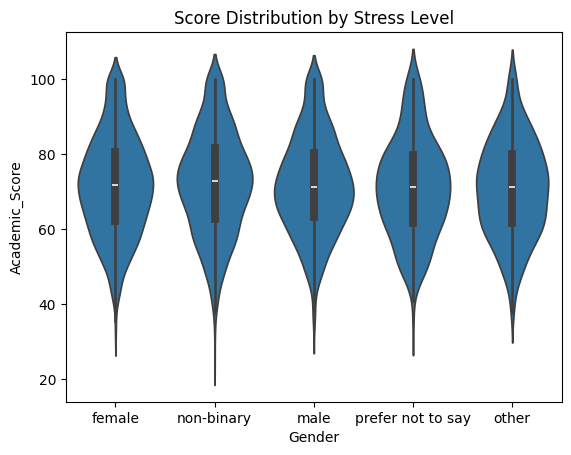

In [ ]:
sns.violinplot(x='Gender', y='Academic_Score', data=df)
plt.title('Score Distribution by Stress Level')

# **Insights**
1. students age is between 16 to 30. all ages almost have equal number of students.
2. The scatter plots are not showing any specific trends means either ostive or negative means the is no strong between  Study_Hours_Per_Day, Sleep_Hours,  Physical_Activity_Hours, Screen_Time_Hours, Social_Activity_Score,
Mental_Wellbeing_Score,Attendance_Rate and academic score.
3. Students with low stress level which is rare have high academic score. Medium and High Stress Level have almost same academic score.
4. All genders have almost equal academicc score.

Text(0.5, 1.0, 'Study Hours vs Sleep Hours')

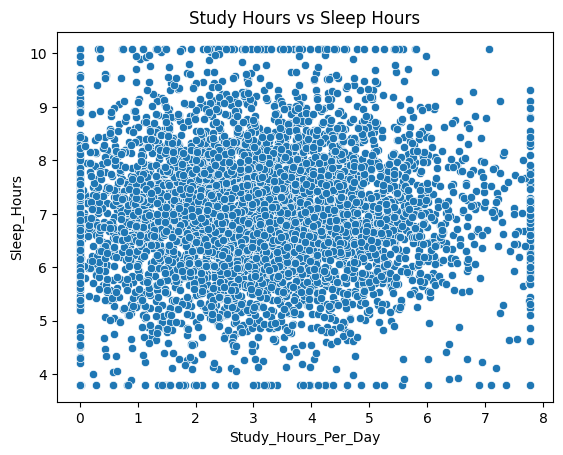

In [ ]:
# 1. Study vs Sleep
sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='Sleep_Hours')
plt.title('Study Hours vs Sleep Hours')



Text(0.5, 1.0, 'Screen Time vs Sleep Hours')

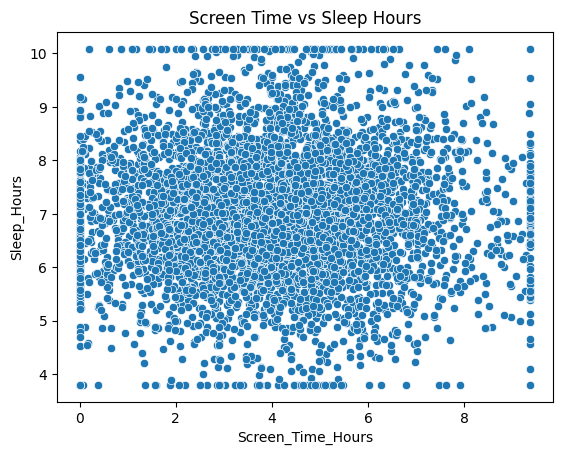

In [ ]:
sns.scatterplot(data=df, x='Screen_Time_Hours', y='Sleep_Hours')
plt.title('Screen Time vs Sleep Hours')



Text(0.5, 1.0, 'Stress Level vs Mental Wellbeing')

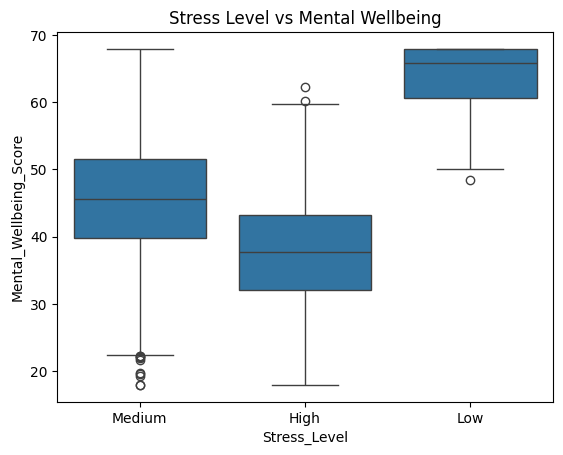

In [ ]:
# 3. Stress vs Wellbeing
sns.boxplot(data=df, x='Stress_Level', y='Mental_Wellbeing_Score')
plt.title('Stress Level vs Mental Wellbeing')




Text(0.5, 1.0, 'Attendance Rate vs Study Hours')

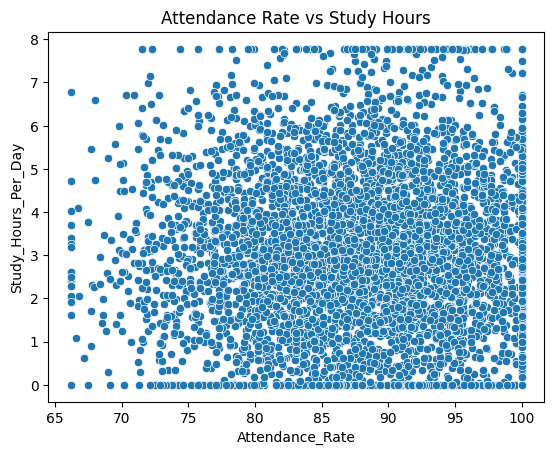

In [ ]:
# 4. Attendance vs Study Hours
sns.scatterplot(data=df, x='Attendance_Rate', y='Study_Hours_Per_Day')
plt.title('Attendance Rate vs Study Hours')


Text(0.5, 1.0, 'Physical Activity vs Mental Wellbeing')

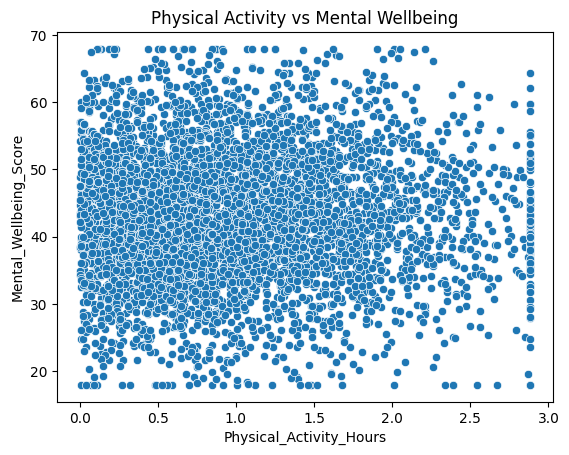

In [ ]:
sns.scatterplot(data=df, x='Physical_Activity_Hours', y='Mental_Wellbeing_Score')
plt.title('Physical Activity vs Mental Wellbeing')


# **Insights**

1. above we make plots between two features column so that we can obersve f there is any clear pattern between them means if one feature is effecting other or or both together effecting the target column.
2. In stress vs metal wellbeing_score we can see student with less have high well being score and there in no clear pattern in other plots.

# **EDA(Multivariant)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Study_Hours_Per_Day      5000 non-null   float64
 3   Sleep_Hours              5000 non-null   float64
 4   Physical_Activity_Hours  5000 non-null   float64
 5   Screen_Time_Hours        5000 non-null   float64
 6   Social_Activity_Score    5000 non-null   float64
 7   Stress_Level             5000 non-null   object 
 8   Academic_Score           5000 non-null   float64
 9   Mental_Wellbeing_Score   5000 non-null   float64
 10  Attendance_Rate          5000 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 429.8+ KB


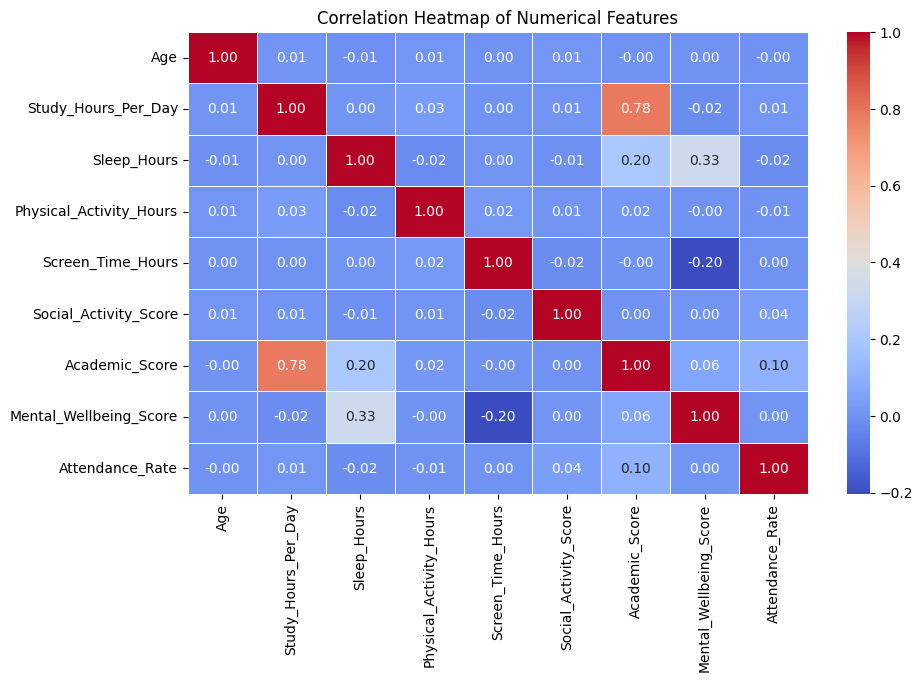

In [ ]:
numeric_cols = ['Age', 'Study_Hours_Per_Day', 'Sleep_Hours', 'Physical_Activity_Hours',
                'Screen_Time_Hours', 'Social_Activity_Score',
                'Academic_Score', 'Mental_Wellbeing_Score', 'Attendance_Rate']

corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')


# **Insights**
1. From above heatmap it is shown that Study_per_hour and academic_score have strongest positive correlation which is (0.78) and screen_time_hours and mental_wellbeing have strongest negative correlation which is (-2.0) here.


Text(0.5, 0.92, '3D Relation: Study Hours, Sleep Hours, and Academic Score')

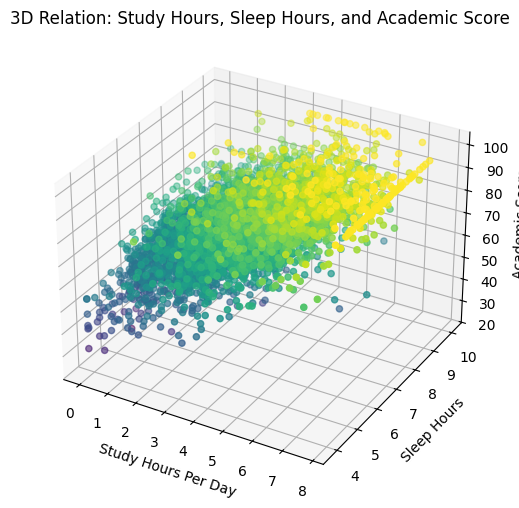

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Study_Hours_Per_Day'], df['Sleep_Hours'], df['Academic_Score'],
           c=df['Academic_Score'], cmap='viridis')

ax.set_xlabel('Study Hours Per Day')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Academic Score')
ax.set_title('3D Relation: Study Hours, Sleep Hours, and Academic Score')


# Inferentials

In [ ]:
from scipy.stats import f_oneway

# Split academic scores by gender category
female = df[df['Gender'] == 'female']['Academic_Score']
male = df[df['Gender'] == 'male']['Academic_Score']
non_binary = df[df['Gender'] == 'non-binary']['Academic_Score']
other = df[df['Gender'] == 'other']['Academic_Score']
prefer_not = df[df['Gender'] == 'prefer not to say']['Academic_Score']

# Apply One-Way ANOVA
f_stat, p_val = f_oneway(female, male, non_binary, other, prefer_not)

print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")


ANOVA F-statistic = 1.264, p-value = 0.2817


**Insights**

as it is shown from anova test p-value = 0.2817 which is < 0.5 which all genders don't score same atleast each gender score is different and F-statistic = 1.264 which genger are not significantly same.

In [ ]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Physical_Activity_Hours'], df['Academic_Score'])

print(f"Spearman Correlation = {corr:.3f}, p-value = {p_value:.4f}")


Spearman Correlation = 0.017, p-value = 0.2178


**Insights**

* as physical activity hours column donot follow any normal distrubution that why i have use Spearman Correlation instead of Pearson's Correlation.
* Spearman’s correlation test between physical activity and academic performance (ρ = 0.017, p = 0.218) shows no significant association, suggesting that physical activity hours have little to no impact on students’ academic scores.

In [25]:
from scipy.stats import pearsonr

cols = ['Age','Study_Hours_Per_Day', 'Sleep_Hours', 'Screen_Time_Hours',
        'Social_Activity_Score', 'Mental_Wellbeing_Score', 'Attendance_Rate']

for col in cols:
        corr, p_val = pearsonr(df[col], df['Academic_Score'])
        print(f"{col} ↔ Academic_Score →    Corr = {corr:.3f},   p-value = {p_val:.4f}")

Age ↔ Academic_Score →    Corr = -0.003,   p-value = 0.8203
Study_Hours_Per_Day ↔ Academic_Score →    Corr = 0.785,   p-value = 0.0000
Sleep_Hours ↔ Academic_Score →    Corr = 0.203,   p-value = 0.0000
Screen_Time_Hours ↔ Academic_Score →    Corr = -0.001,   p-value = 0.9454
Social_Activity_Score ↔ Academic_Score →    Corr = 0.001,   p-value = 0.9650
Mental_Wellbeing_Score ↔ Academic_Score →    Corr = 0.064,   p-value = 0.0000
Attendance_Rate ↔ Academic_Score →    Corr = 0.102,   p-value = 0.0000


**Insights**
* All the selected columns are numeric and normally distributed, so applying the Pearson correlation test is appropriate to measure the linear relationships between each variable and Academic_Score.
* Study_Hours_Per_Day shows the strongest and most significant relationship with Academic_Score, indicating it’s the most influential factor.
* Sleep_Hours, Mental_Wellbeing_Score, and Attendance_Rate have weak but statistically significant positive effects.
* 'Age','Screen_Time_Hours and Social_Activity_Score show no significant relationship, implying they do not impact academic performance in this dataset.

In [ ]:
from scipy.stats import f_oneway

# Split academic scores by gender category
med = df[df['Stress_Level'] == 'Medium']['Academic_Score']
high = df[df['Stress_Level'] == 'High']['Academic_Score']
low = df[df['Stress_Level'] == 'Low']['Academic_Score']


# Apply One-Way ANOVA
f_stat, p_val = f_oneway(med,high,low)

print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

ANOVA F-statistic = 45.304, p-value = 0.0000


* Students’ academic performance varies significantly depending on their stress level.
* At least one stress group (e.g., Low vs. High) has a different average academic score compared to the others.

# **Feature Engineering**

# **Encode Categorical Features**

In [ ]:
df["Gender"].unique()

array(['female', 'non-binary', 'male', 'prefer not to say', 'other'],
      dtype=object)

In [ ]:
df=pd.get_dummies(df, columns=['Gender'], prefix='Gender', drop_first=True)
df.head()

,Age,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Stress_Level,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Gender_male,Gender_non-binary,Gender_other,Gender_prefer not to say
0,18,5.60,7.42,0.09,4.79,6.7,Medium,98.0,63.3,89.2,False,False,False,False
1,24,2.93,7.57,0.35,4.61,8.6,Medium,67.2,39.0,89.8,False,False,False,False
2,24,3.45,8.00,0.11,5.59,5.9,Medium,68.1,37.4,72.3,False,False,False,False
3,16,2.78,6.37,1.71,2.53,5.4,Medium,66.7,39.1,84.7,False,True,False,False
4,27,0.00,4.87,0.46,0.65,7.2,Medium,38.6,41.6,92.6,False,False,False,False


In [ ]:
df["Stress_Level"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [ ]:
df=pd.get_dummies(df, columns=['Stress_Level'], prefix='Stress_Level', drop_first=True)
df.head()

,Age,Study_Hours_Per_Day,Sleep_Hours,Physical_Activity_Hours,Screen_Time_Hours,Social_Activity_Score,Academic_Score,Mental_Wellbeing_Score,Attendance_Rate,Gender_male,Gender_non-binary,Gender_other,Gender_prefer not to say,Stress_Level_Low,Stress_Level_Medium
0,18,5.60,7.42,0.09,4.79,6.7,98.0,63.3,89.2,False,False,False,False,False,True
1,24,2.93,7.57,0.35,4.61,8.6,67.2,39.0,89.8,False,False,False,False,False,True
2,24,3.45,8.00,0.11,5.59,5.9,68.1,37.4,72.3,False,False,False,False,False,True
3,16,2.78,6.37,1.71,2.53,5.4,66.7,39.1,84.7,False,True,False,False,False,True
4,27,0.00,4.87,0.46,0.65,7.2,38.6,41.6,92.6,False,False,False,False,False,True


# **Feature selection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Study_Hours_Per_Day       5000 non-null   float64
 2   Sleep_Hours               5000 non-null   float64
 3   Physical_Activity_Hours   5000 non-null   float64
 4   Screen_Time_Hours         5000 non-null   float64
 5   Social_Activity_Score     5000 non-null   float64
 6   Academic_Score            5000 non-null   float64
 7   Mental_Wellbeing_Score    5000 non-null   float64
 8   Attendance_Rate           5000 non-null   float64
 9   Gender_male               5000 non-null   bool   
 10  Gender_non-binary         5000 non-null   bool   
 11  Gender_other              5000 non-null   bool   
 12  Gender_prefer not to say  5000 non-null   bool   
 13  Stress_Level_Low          5000 non-null   bool   
 14  Stress_L

# **Scaling Numerical columns**

In [ ]:
X = df.drop(columns=["Academic_Score"])
y = df["Academic_Score"]

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
